In [20]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
import hyperspy.api as hs

import dpc_suite as dpcs
import plot_tools as pt

plt.rcParams.update({'font.size':20})
plt.rcParams['font.sans-serif'] = "Helvetica"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def get_CoM(ar, device="cpu", corner_centered=False):
    """
    Finds and returns the center of mass of array ar.
    If corner_centered is True, uses fftfreq for indices.
    """
    if device == "cpu":
        xp = np
    elif device == "gpu":
        xp = cp

    ar = xp.asarray(ar)
    nx, ny = ar.shape

    if corner_centered:
        ry, rx = xp.meshgrid(xp.fft.fftfreq(ny, 1 / ny), xp.fft.fftfreq(nx, 1 / nx))
    else:
        ry, rx = xp.meshgrid(xp.arange(ny), xp.arange(nx))

    tot_intens = xp.sum(ar)
    xCoM = xp.sum(rx * ar) / tot_intens
    yCoM = xp.sum(ry * ar) / tot_intens
    return(xCoM, yCoM)

[[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
   6.66666667  7.77777778  8.88888889 10.        ]
 [ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
   6.66666667  7.77777778  8.88888889 10.        ]
 [ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
   6.66666667  7.77777778  8.88888889 10.        ]
 [ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
   6.66666667  7.77777778  8.88888889 10.        ]
 [ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
   6.66666667  7.77777778  8.88888889 10.        ]
 [ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
   6.66666667  7.77777778  8.88888889 10.        ]
 [ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
   6.66666667  7.77777778  8.88888889 10.        ]
 [ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
   6.66666667  7.77777778  8.88888889 10.        ]


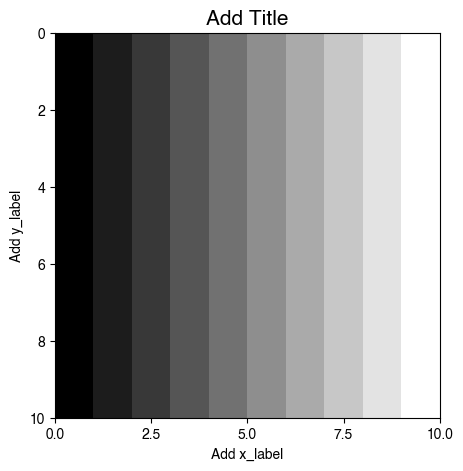

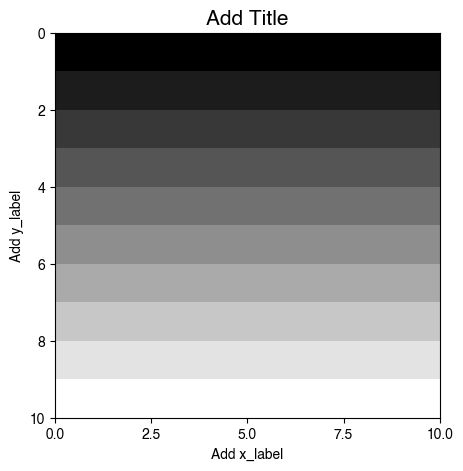

In [22]:
x, y = np.meshgrid(np.linspace(0,10,10), np.linspace(0,10,10))

print(x, y)

pt.plot_2D(x)
pt.plot_2D(y)

In [3]:
### Define the directory where your data is located
base = str('/Users/fzy/ORNL/Research/FNPP/' +
           '250509_240909_FNPP_110j_001c_echip_4DLSTEM/')


SB_NM =  2700
(1024, 1024) 13 nm


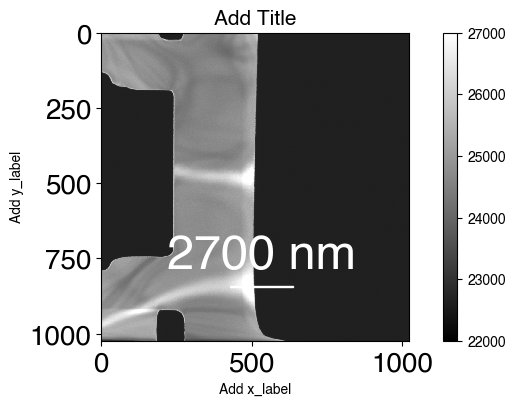

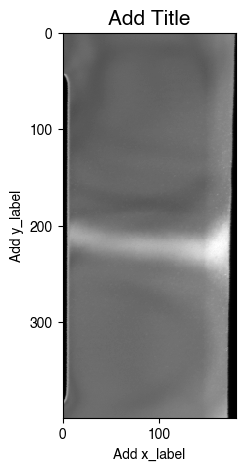

SB_NM =  200
(64, 64) 13 nm


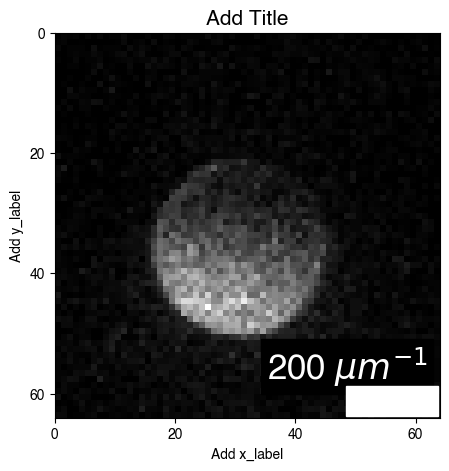

In [5]:
fn = 'prej_init_mag2_180pix_399pix_20nm_step_0p5rot'
data_fn = str(base + fn)
init_state = hs.load(data_fn + '.dm4')
pix_nm = 20 #nm/pix reported from JEOL NeoARM during experiment on 250401
data = init_state[2].data
pt.plot_2D(init_state[0].data,
           filename = str(base + 'HAADF_survey_with_sb_' + fn),
           pix_len = 13, scalebar = True,
           vmin = 22000, vmax = 27000, colorbar=True)
pt.plot_2D(init_state[1].data,
           filename = str(base + 'HAADF_with_sb' + fn),
           vmin = np.min(init_state[1].data), vmax = np.max(init_state[1].data),
           # colorbar = True, fig_size=(10,5),
           pix_len=pix_nm, scalebar = False)
pt.plot_2D(data[0,0],
           filename = str(base + 'CBED00_with_sb' + fn),
           pix_len=13, scalebar = True, sb_label=False,
           annotation_loc = [0.55,0.9], annotation_size=25, annotation='200 $\mu m^{-1}$')
#convergence semiangle ~ 0.5 mrad

In [6]:
print(init_state[1].metadata)
print(init_state[1].axes_manager)

├── Acquisition_instrument
│   └── TEM
│       ├── Stage
│       │   ├── tilt_alpha = -4.16097736358643
│       │   ├── tilt_beta = 11.8282041549683
│       │   ├── x = -0.0421182098388672
│       │   ├── y = 0.0824972229003906
│       │   └── z = 7.9474076628685e-05
│       ├── acquisition_mode = STEM
│       ├── beam_current = 0.0
│       ├── beam_energy = 200.0
│       ├── camera_length = 1500.0
│       ├── dwell_time = 1.6e-05
│       └── magnification = 15000.0
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 2.2.0
│   │       ├── io_plugin = rsciio.digitalmicrograph
│   │       ├── operation = load
│   │       └── timestamp = 2025-07-02T21:51:48.938106-04:00
│   ├── date = 2025-05-09
│   ├── original_filename = prej_init_mag2_180pix_399pix_20nm_step_0p5rot.dm4
│   ├── time = 16:48:51
│   └── title = JEOL ADF Image
├── Sample
│   └── description = 03052025_TN_06_Pt
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain

(399, 180, 64, 64) (64, 64)


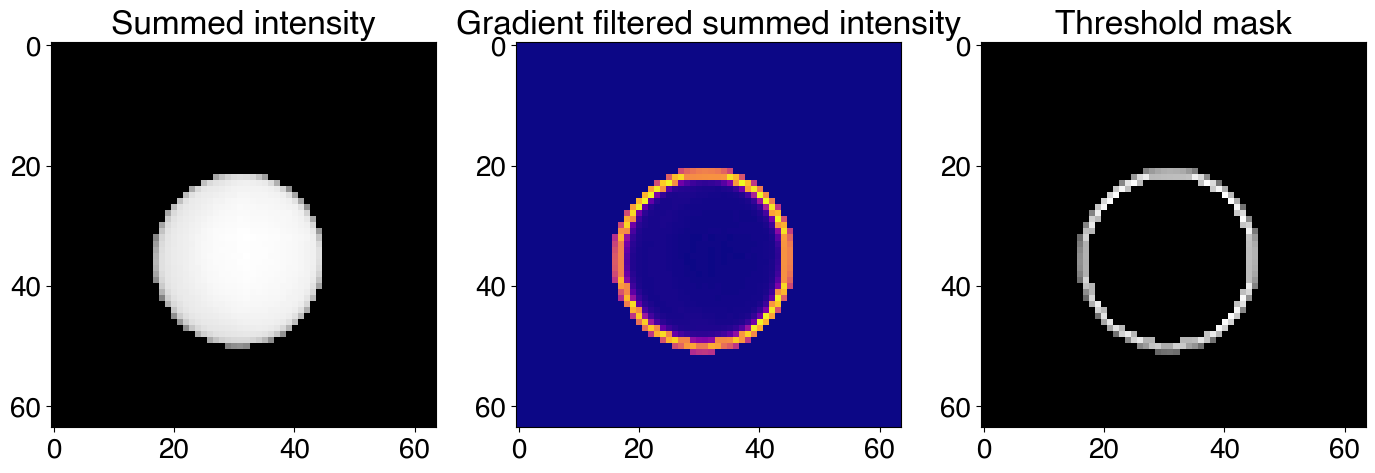

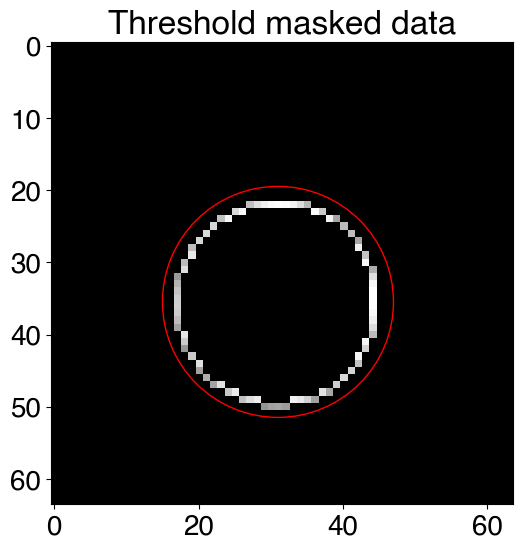

true_center =  (35.46324593719207, 30.97837967135156)
mask_center =  (-2.7424908570306465, -0.6776237945549476)


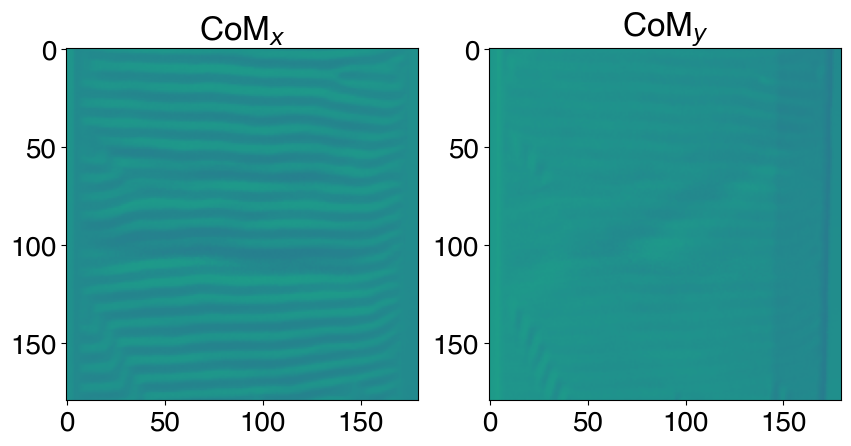

In [9]:
b_im_dir = str(base + 'field_ims/')
if not os.path.isdir(b_im_dir):
    os.mkdir(b_im_dir)

summed_data = np.sum(np.sum(np.copy(data),axis=0),axis=0)
summed_data[summed_data < (np.mean(summed_data) + np.std(summed_data))] = 0
print(np.shape(data), np.shape(summed_data))

# Take the gradient and threshold filter the data to find the 'edge' and center of the CBED disk
gradient_summed_data = np.copy(summed_data) - np.min(summed_data)
gradient_h = np.gradient(gradient_summed_data)[0]  # horizontal gradient
gradient_v = np.gradient(gradient_summed_data)[1]  # vertical gradient
gradient_summed_data_magnitude = np.sqrt(gradient_h**2 + gradient_v**2)
gradient_summed_data_mask = np.copy(gradient_summed_data_magnitude)
gradient_summed_data_mask[gradient_summed_data_mask < (np.mean(gradient_summed_data_mask) +
                                                 2.4 * np.std(gradient_summed_data_mask))] = 0 #"mean + 2.4 sigma" is the threshold
thresh_mask = (gradient_summed_data_mask!=0)

#define midx and midy to be the center of the image dimensions (midx = image width / 2, midy = image length / 2)
midx = data.shape[3] // 2
midy = data.shape[2] // 2

# calculate the center of the disc
true_center = get_CoM(gradient_summed_data_mask, corner_centered=False)
fig, ax = plt.subplots(1,3, figsize=(17,5))
ax[0].imshow(summed_data, cmap = 'gray')
ax[0].set_title('Summed intensity')
ax[1].imshow(gradient_summed_data_magnitude, cmap = 'plasma')
ax[1].set_title('Gradient filtered summed intensity')
ax[2].imshow(gradient_summed_data_mask, cmap = 'gray')
ax[2].set_title('Threshold mask')
plt.show()


# Plot the threshold mask with the summed data of the n'th current value
figure, axes = plt.subplots(figsize=(6,6))
plt.imshow(summed_data * thresh_mask, cmap='gray')
plt.title('Threshold masked data')
circle = plt.Circle( (true_center[1], true_center[0]),
                    16 ,
                    fill = False, color='r')
 
axes.set_aspect(1)
axes.add_artist(circle)
# plt.imshow(thresh_mask)
plt.show()

print('true_center = ', true_center)


## Calculate the center of mass after masking the data with the universal mask aligned to the center of the summed disc image
com_arr = np.zeros((2, data.shape[0], data.shape[1]))
mask_center = get_CoM(ar=summed_data * thresh_mask, corner_centered=True)

for i,_ in enumerate(data):
    for j,_ in enumerate(data[0]):
        #For threshold mask (irregular shape)
        com_arr[0,i,j], com_arr[1,i,j] = get_CoM(ar=data[i,j] * thresh_mask,
                                                 corner_centered=True)



print('mask_center = ', mask_center)

## Resize the field array to be the square central region of the original array with the small axis length as the new axes length
xlen_new = np.min(np.shape(com_arr[0]))
com_arr_square_resize = np.zeros((2,xlen_new, xlen_new))
midx = np.shape(com_arr)[2] // 2
midy = np.shape(com_arr)[1] // 2
com_arr_square_resize = com_arr[:,midy - (xlen_new // 2):midy + (xlen_new // 2),
                                midx - (xlen_new // 2):midx + (xlen_new // 2)]

## Plot the center of mass shifts.
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(com_arr_square_resize[0], vmin = -100, vmax = 100)
axes[1].imshow(com_arr_square_resize[1], vmin = -100, vmax = 100)
axes[0].set_title('CoM$_x$')
axes[1].set_title('CoM$_y$')
# fig.savefig(str(filepath + "im_" + str(mask_width) + "pix_width_mask_inner_r_"
#                 + str(mask_inner_r)))
fig.savefig(str(data_fn + "_im_thresh_mask"))
plt.show()

## Calculate the in-plane magnetic induction from the center of mass shifts
s_norm = dpcs.calc_B_from_CoM(x_com = com_arr_square_resize[1],
                              y_com = com_arr_square_resize[0],
                              sv_file_name=str(b_im_dir + '_B_init_state'), # where you want to save your data
                              auto_remove_offset=False, # Recalculates the center of mass (COM) with the center region taken as 0 deflection.
                              magnetic=True, # True: plots magnetic field from COM, False: plots electric field from COM
                              normalize=False, # Normalizes the intensity values between 0 and 1.
                              save_field = False, # If True, saves x and y component of the field as .npy files
                              )

# s_norm is the normalized field array with shape (3, nz, ny, nx), where the first dimension corresponds
# to the x, y, and z component of the field, respectively. Note that if the z-component is not specified,
# it is filled with zeros. sx = s_norm[0,0,:,:], sy = s_norm[1,0,:,:]

0it [00:00, ?it/s]

(3, 1, 180, 180) (180, 180)
(180, 180)


1it [00:00,  2.19it/s]

ANGLE= (0, 0, 180)
[-0.884 -0.862 -0.857 ...  0.983  0.987  0.989] 0
[-0.884 -0.862 -0.857 ...  0.983  0.987  0.989] 1
M_STEP = 4


<Figure size 640x480 with 0 Axes>

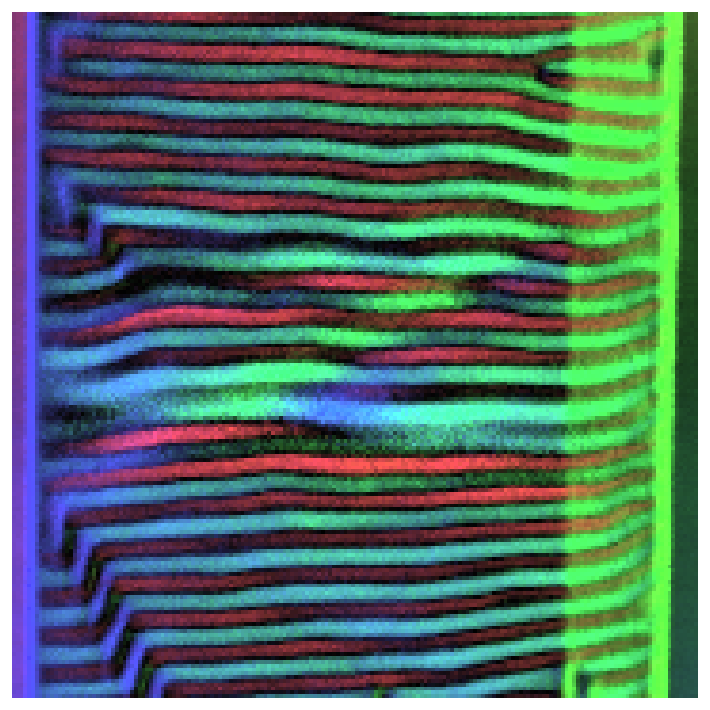

0it [00:00, ?it/s]

(3, 1, 180, 180) (180, 180)
(180, 180)


1it [00:00,  2.19it/s]

ANGLE= (0, 0, 180)
[-0.884 -0.862 -0.857 ...  0.983  0.987  0.989] 0
[-0.884 -0.862 -0.857 ...  0.983  0.987  0.989] 1
M_STEP = 4


(180, 180) 20 nm
SB_NM =  1100


<Figure size 640x480 with 0 Axes>

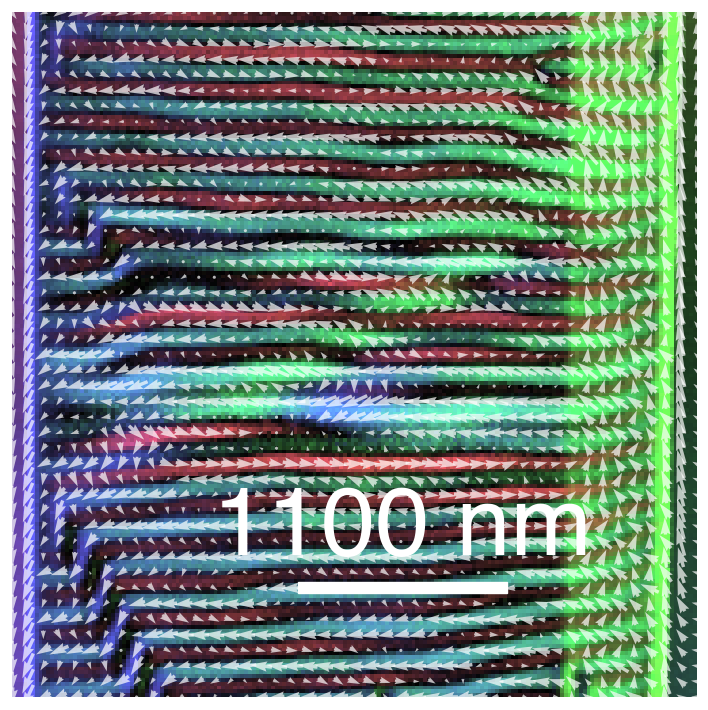

<Figure size 640x480 with 0 Axes>

In [19]:
## Save the magnetic field as a numpy array
# np.save(str(data_fn + 'B_thresh_mask.npy'), s_norm_square_resize[:,0,::-1,:])
dpcs.plot_B_3D(b_arr = s_norm[:,0,::-1,:],
               sv_file_name=str(b_im_dir +
                                'initial_B_gradient_thresh_mask'),  # where you want to save your data
               # sv_file_name=str(filepath + 'B_init_state_mask' +
               #                  str(mask_width) + 'pix_width_mask_inner_r_'+
               #                  str(mask_inner_r)),  # where you want to save your data
               im_w=1, # Crops image to a fraction of image height and width you want to plot. Value from [0,1].
               arrows=False, # Plots arrows
               arr_w=1/100, # Scales the width of the plotted arrows
               arr_scale=10, # Scales the length of the arrows inversely (smaller value is longer arrow)
               m_step=4, # Number of pixels between plotted arrows
               offset_angle=180, # Base rotation angle (defined by illumination/camera length settings) + scan rotation angle
               sv_rot_file_name = str(data_fn + 'initial_B_thresh_mask.npy'), #save rotated data
               nm_pix=pix_nm, # Sets the pixel length for scalebar calculation
               scalebar = False, # If True, plots a scalebar
               high_saturation=True, # Plots saturation like I ** 2 if True
               vmax=0.8 # sets an upper bound on the intensity range that the colormap plots
              )

dpcs.plot_B_3D(b_arr = s_norm[:,0,::-1,:],
               sv_file_name=str(b_im_dir +
                                'initial_B_gradient_thresh_mask_sb'),  # where you want to save your data
               # sv_file_name=str(filepath + 'B_init_state_mask' +
               #                  str(mask_width) + 'pix_width_mask_inner_r_'+
               #                  str(mask_inner_r)),  # where you want to save your data
               im_w=1, # Crops image to a fraction of image height and width you want to plot. Value from [0,1].
               arrows=True, # Plots arrows
               arr_w=1/200, # Scales the width of the plotted arrows
               arr_scale=20, # Scales the length of the arrows inversely (smaller value is longer arrow)
               m_step=4, # Number of pixels between plotted arrows
               offset_angle=180, # Base rotation angle (defined by illumination/camera length settings) + scan rotation angle
               nm_pix=pix_nm, # Sets the pixel length for scalebar calculation
               scalebar = True, # If True, plots a scalebar
               high_saturation=True, # Plots saturation like I ** 2 if True
               vmax=1 # sets an upper bound on the intensity range that the colormap plots
              )